# 1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler

import warnings

In [48]:
# Leemos el dataset
california_housing = fetch_california_housing()

In [50]:
# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [51]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [52]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

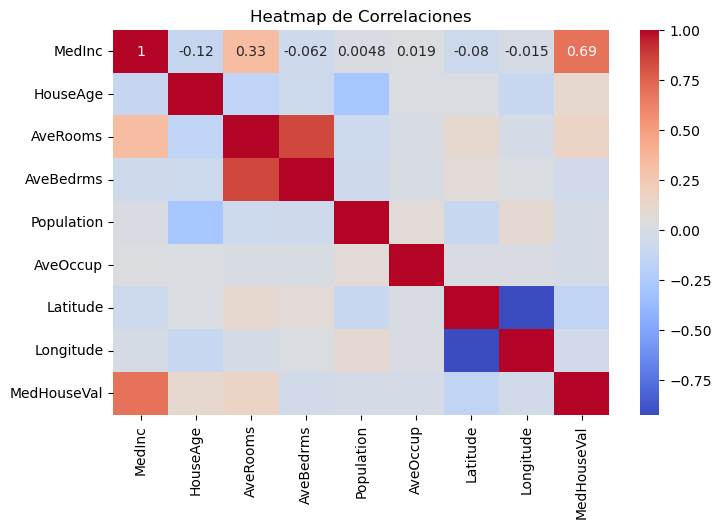

In [53]:
correlation_matrix = df_california.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Heatmap de Correlaciones')
plt.show()

MedHouseVal y MedInc vendrian teniendo la mayor relacion, teniendo en cuenta que usamos MedHouseVal como target.
AveRooms y AveBedrms tienen el mayor grado de correlacion teniendo en cuenta que ambos son features.

In [54]:
# Graficamos el dataset
plt.figure(figsize=(7, 5))
plt.scatter(X['MedInc'], y['MedHouseVal'] , color='r', marker="x", s=60)
plt.grid(True, linewidth=0.5)
plt.xlabel('Tiempo [h]', fontsize=14)
plt.ylabel('Concentración [mg/L]', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Dataset de concentración de droga vs. tiempo', fontsize=16)
plt.show()

KeyError: 'MedHouseVal'

<Figure size 700x500 with 0 Axes>

# 2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

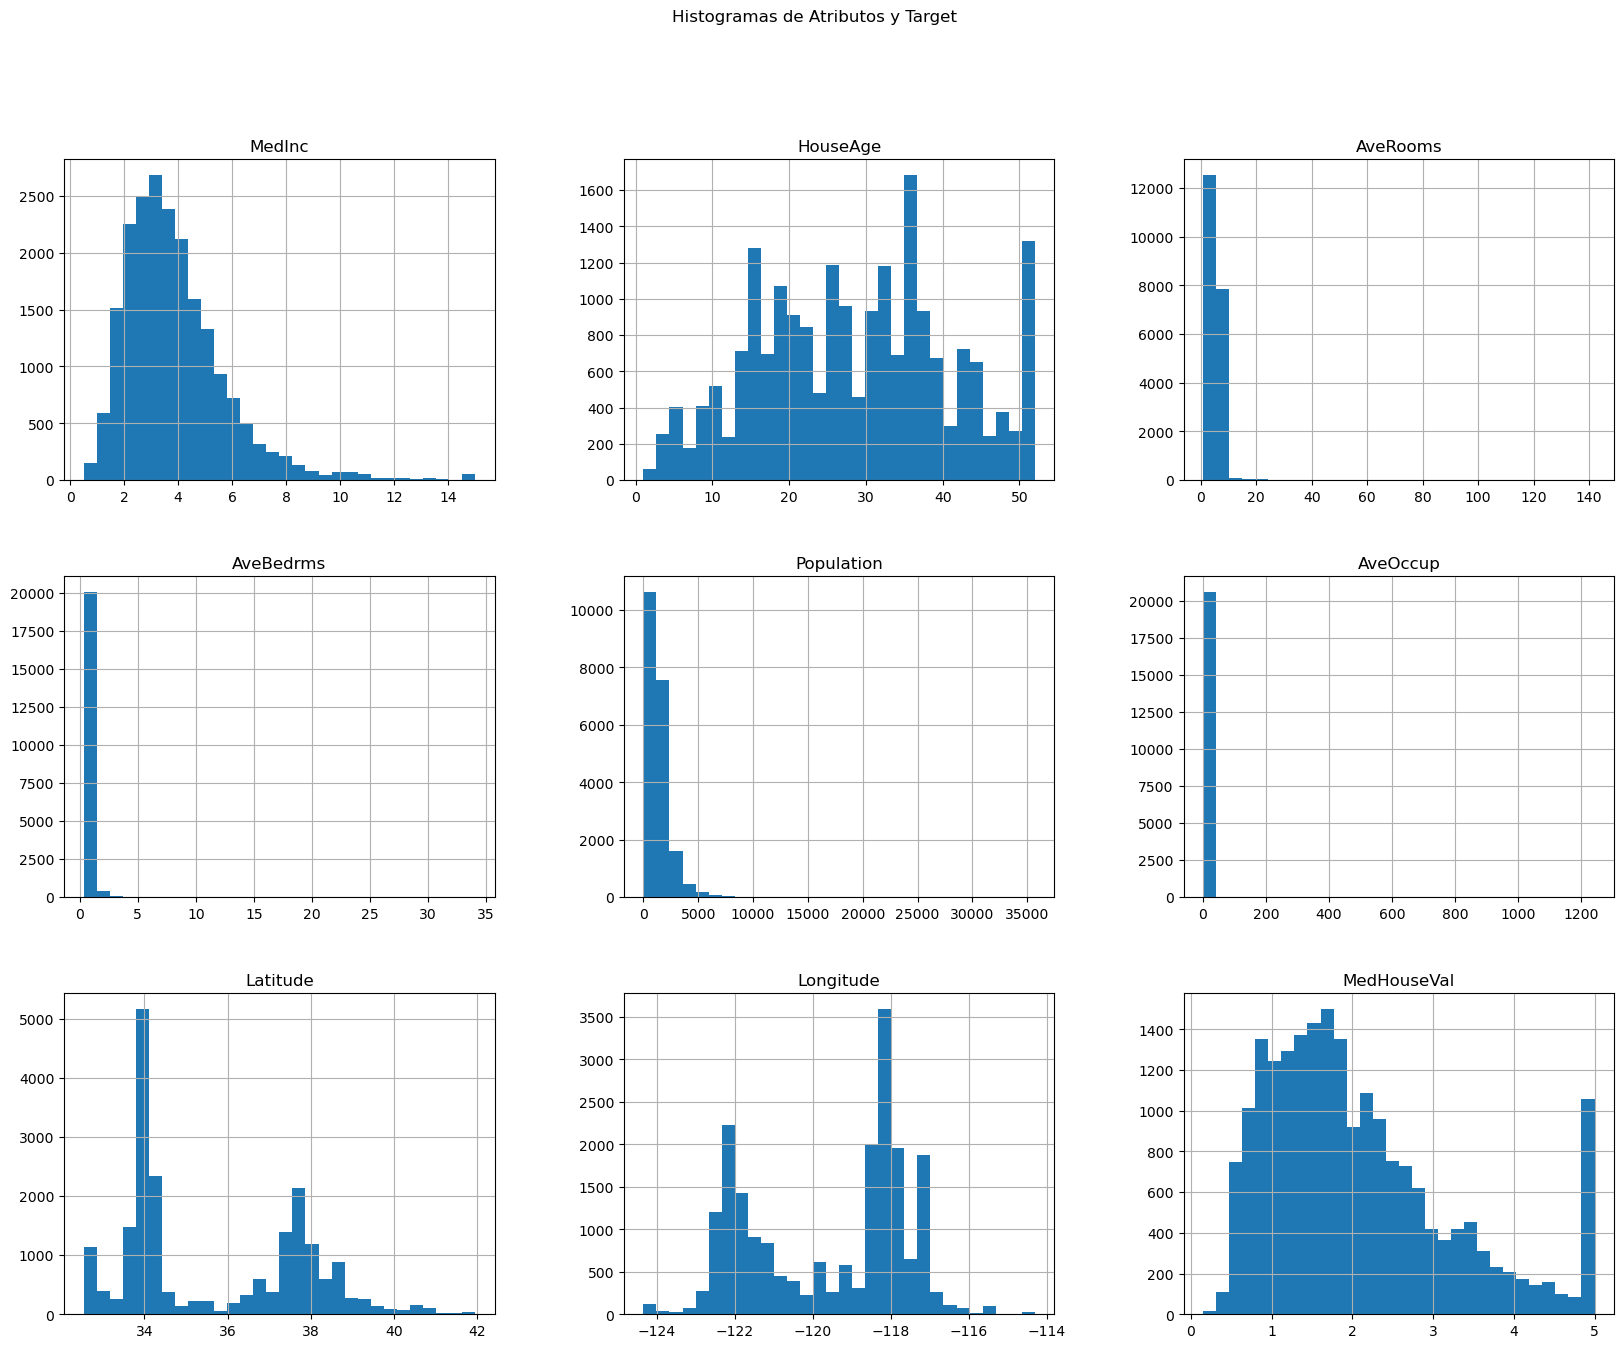

In [23]:
# Graficar histogramas
df_california.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogramas de Atributos y Target')
plt.show()

La mayoría de los atributos no presentan una forma de campana que indicaría una distribución gaussiana. En cambio, muchos de los histogramas muestran distribuciones sesgadas o multimodales. Esto sugiere que los datos pueden no seguir una distribución normal y que la aplicación de técnicas de transformación o métodos robustos puede ser necesaria para el análisis y modelado de los datos.

# 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [24]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])


In [83]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)


# Realizar predicciones con el conjunto de entrenamiento
y_pred = model.predict(X_train_scaled)

In [94]:
total_variance = np.var(y_train)
r2_train=model.score(X_train_scaled, y_train)
explained_variance = explained_variance_score(y_train,y_pred)

print(f"La varianza total es {total_variance}")
print(f"El coeficiente de Pearson es {r2_train}")
print(f"La Varianza explicada es {explained_variance}")


La varianza total es 1.3396959774719308
El coeficiente de Pearson es 0.6093459727972159
La Varianza explicada es 0.6093459727972159


# 4. Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [62]:
y_pred_test = model.predict(X_test_scaled)

In [76]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

In [77]:
print("R-cuadrado en test:", r2)
print("MAE:", mae)
print("MSE:", mse)

R-cuadrado en test: 0.5957702326061665
MAE: 0.5272474538305953
MSE: 0.5305677824766752


# 5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de &#945;, buscando entre [0, 12.5]. Graficar el valor de MSE versus &#945;.

Mejor valor de alpha: 8.673469387755102


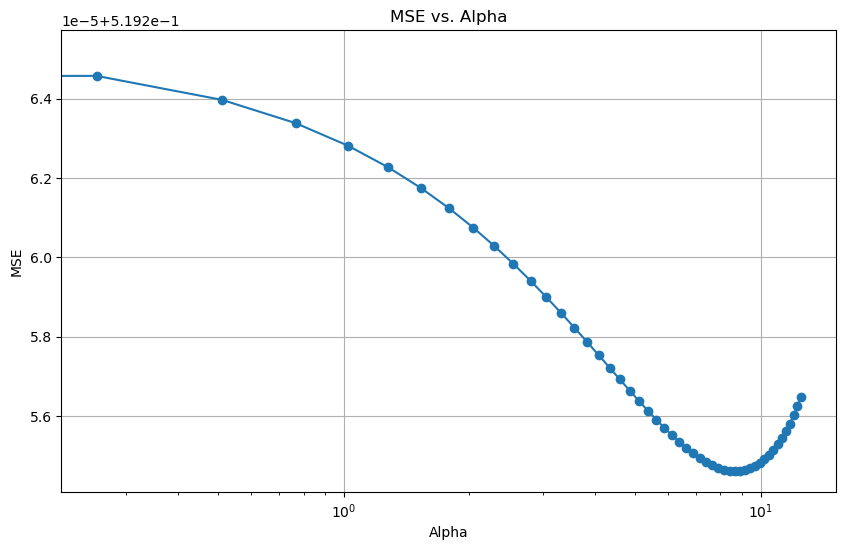

In [12]:
# Definir el rango de valores para alpha
alpha_range = np.linspace(0, 12.5, 50)

# Crear el modelo Ridge
ridge = Ridge()

# Configurar GridSearchCV para encontrar el mejor alpha, 5 folds
param_grid = {'alpha': alpha_range}
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

# Calcular el MSE para cada valor de alpha
mse_values = -grid.cv_results_['mean_test_score']

# Graficar MSE vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.grid(True)
plt.show()


# 6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

Regresión Lineal:
MSE: 0.5558915986952441
MAE: 0.5332001304956573
R^2: 0.575787706032451

Regresión Ridge:
MSE: 0.5551496685049945
MAE: 0.5332374203444554
R^2: 0.5763538881958589

Comparación de Resultados:
               Model       MSE       MAE       R^2
0  Linear Regression  0.555892  0.533200  0.575788
1   Ridge Regression  0.555150  0.533237  0.576354


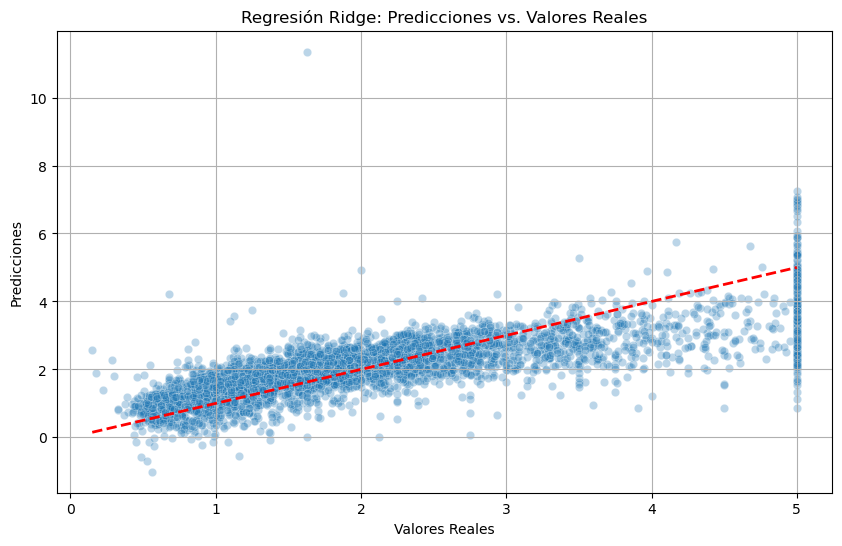

In [12]:
# Ajustar el modelo de regresión Ridge con el mejor alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)

# Calcular las métricas para el modelo de regresión Ridge
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Mostrar los resultados de la comparación
print("Regresión Lineal:")
print(f"MSE: {mse_lin}")
print(f"MAE: {mae_lin}")
print(f"R^2: {r2_lin}")

print("\nRegresión Ridge:")
print(f"MSE: {mse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R^2: {r2_ridge}")

# Comparar los resultados
result_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'MSE': [mse_lin, mse_ridge],
    'MAE': [mae_lin, mae_ridge],
    'R^2': [r2_lin, r2_ridge]
})

print("\nComparación de Resultados:")
print(result_comparison)

# Graficar Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Ridge: Predicciones vs. Valores Reales')
plt.grid(True)
plt.show()